In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

In [122]:
# import data
census = pd.read_csv("ACS_Full_Features.csv")

In [123]:
# check data
census.head()

,NAME,Median Age by Sex,Total Population,White,Black/African American,American Indian/Alaskan,Asian,Hawaiian/Pacific Islander,Some Other Race,Two or More Races,...,Black/African American Population (%),Asian Population (%),Hawaiian/Pacific Islander Population (%),American Indian/Alaskan Population (%),Some Other Race Population (%),Two or More Races Population (%),Disabled Population (%),Disabled Population Category,state,county
0,"Autauga County, Alabama",39.0,58761,43747,11496,59,658,0,321,2480,...,19.563997,1.119790,0.000000,0.100407,0.546281,4.220486,16.039550,Medium,1,1
1,"Baldwin County, Alabama",43.7,233420,195998,19445,848,2046,31,4414,10638,...,8.330477,0.876532,0.013281,0.363294,1.891012,4.557450,13.656927,Low,1,3
2,"Barbour County, Alabama",40.6,24877,11309,11668,74,126,3,1088,609,...,46.902762,0.506492,0.012059,0.297464,4.373518,2.448044,15.958516,Medium,1,5
3,"Bibb County, Alabama",40.3,22251,16872,4603,21,69,0,108,578,...,20.686711,0.310098,0.000000,0.094378,0.485371,2.597636,18.412656,Medium,1,7
4,"Blount County, Alabama",40.8,59077,53941,729,227,100,117,1859,2104,...,1.233983,0.169271,0.198047,0.384244,3.146741,3.561454,16.839041,Medium,1,9


In [124]:
# Remove category columns, name column, fips codes to start
census.columns

Index(['NAME', 'Median Age by Sex', 'Total Population', 'White',
       'Black/African American', 'American Indian/Alaskan', 'Asian',
       'Hawaiian/Pacific Islander', 'Some Other Race', 'Two or More Races',
       'Male', 'Female', 'Never Married', 'Now Married', 'Widowed', 'Divorced',
       '12th Grade, No Diploma', 'High School Diploma', 'GED',
       'Some College <1 Year', 'Some College >1 Year', 'Associate's Degree',
       'Bachelor's Degree', 'Master's Degree', 'Professional School Degree',
       'Doctorate', 'Median Income', 'Population Below Poverty Line',
       'Disabled Population', 'Total Income 10k(%)', 'Total Income 10k-15k(%)',
       'Total Income 15k-25k(%)', 'Total Income 25k-35k(%)',
       'Total Income 35k-50(%)', 'Total Income 50k-75k(%)',
       'Total Income 75k-100k(%)', 'Total Income 100k-150k(%)',
       'Total Income 150k-200k(%)', 'Total Income >200k(%)', 'Income Category',
       'Poverty Rate (%)', 'Poverty Rate Classification', 'Total Degrees',
   

In [125]:
# Drop redundant columns like non-percent values, categorical columns, name, state, county

census_svm = census.drop(columns = ['NAME', 'White',
       'Black/African American', 'American Indian/Alaskan', 'Asian',
       'Hawaiian/Pacific Islander', 'Some Other Race', 'Two or More Races', "Associate's Degree",
       "Bachelor's Degree", "Master's Degree", 'Professional School Degree',
       'Doctorate', 'Population Below Poverty Line',
       'Disabled Population', 'Median Income', 'Income Category', 'Poverty Rate (%)', 'Total Degrees', 'Degree Attainment', 'POC Population Category', 'White Population (%)',
       'Black/African American Population (%)', 'Asian Population (%)',
       'Hawaiian/Pacific Islander Population (%)',
       'American Indian/Alaskan Population (%)',
       'Some Other Race Population (%)', 'Two or More Races Population (%)', 'Disabled Population Category', 'state',
       'county'])

# Make second set to test income level
census_svm2 = census.drop(columns = ['NAME', 'White',
       'Black/African American', 'American Indian/Alaskan', 'Asian',
       'Hawaiian/Pacific Islander', 'Some Other Race', 'Two or More Races', "Associate's Degree",
       "Bachelor's Degree", "Master's Degree", 'Professional School Degree',
       'Doctorate', 'Population Below Poverty Line',
       'Disabled Population', 'Median Income', 'Poverty Rate Classification', 'Total Degrees', 'Degree Attainment', 'POC Population Category', 'White Population (%)',
       'Black/African American Population (%)', 'Asian Population (%)',
       'Hawaiian/Pacific Islander Population (%)',
       'American Indian/Alaskan Population (%)',
       'Some Other Race Population (%)', 'Two or More Races Population (%)', 'Disabled Population Category', 'state',
       'county'])

In [126]:
census_svm.head()

,Median Age by Sex,Total Population,Male,Female,Never Married,Now Married,Widowed,Divorced,"12th Grade, No Diploma",High School Diploma,...,Total Income 35k-50(%),Total Income 50k-75k(%),Total Income 75k-100k(%),Total Income 100k-150k(%),Total Income 150k-200k(%),Total Income >200k(%),Poverty Rate Classification,Degree Percentage (%),POC Population (%),Disabled Population (%)
0,39.0,58761,28663,30098,31283,19408,3274,5829,704,10001,...,12.2,16.4,14.5,17.8,6.8,7.4,Low Poverty,20.215789,25.550961,16.039550
1,43.7,233420,114077,119343,123882,76904,12778,22974,3299,38059,...,12.1,16.0,14.4,17.0,7.5,9.1,Low Poverty,23.299203,16.018764,13.656927
2,40.6,24877,12973,11904,14573,7202,1499,2907,488,5136,...,13.2,15.4,8.3,10.9,2.8,3.8,High Poverty,8.441532,54.528279,15.958516
3,40.3,22251,11897,10354,12287,6598,1482,2442,729,5261,...,11.2,17.0,14.8,12.3,3.0,3.5,Low Poverty,7.815379,24.174194,18.412656
4,40.8,59077,29864,29213,30951,18142,3945,5482,1029,11248,...,14.2,16.4,12.9,15.3,6.4,4.9,Low Poverty,10.185013,8.495692,16.839041


In [127]:
# Check corr for multicollinearity, drop more columns
numeric_data = census_svm.select_dtypes(include=[np.number])
numeric_data.corr()

,Median Age by Sex,Total Population,Male,Female,Never Married,Now Married,Widowed,Divorced,"12th Grade, No Diploma",High School Diploma,...,Total Income 25k-35k(%),Total Income 35k-50(%),Total Income 50k-75k(%),Total Income 75k-100k(%),Total Income 100k-150k(%),Total Income 150k-200k(%),Total Income >200k(%),Degree Percentage (%),POC Population (%),Disabled Population (%)
Median Age by Sex,1.000000,-0.164515,-0.165130,-0.163873,-0.160616,-0.161082,-0.133016,-0.157574,-0.124214,-0.148040,...,0.149705,0.133644,0.096237,-0.024147,-0.137164,-0.167245,-0.112324,0.039915,-0.346768,0.386163
Total Population,-0.164515,1.000000,0.999876,0.999881,0.998902,0.999287,0.985320,0.983243,0.956766,0.981963,...,-0.206665,-0.200617,-0.150528,-0.019950,0.123290,0.263977,0.375554,0.323869,0.215563,-0.218180
Male,-0.165130,0.999876,1.000000,0.999514,0.998484,0.999015,0.983843,0.982787,0.956730,0.980817,...,-0.207367,-0.201057,-0.150027,-0.018872,0.124668,0.265006,0.376034,0.322471,0.213721,-0.218895
Female,-0.163873,0.999881,0.999514,1.000000,0.999072,0.999313,0.986531,0.983453,0.956571,0.982849,...,-0.205927,-0.200138,-0.150982,-0.021002,0.121909,0.262905,0.374994,0.325162,0.217316,-0.217425
Never Married,-0.160616,0.998902,0.998484,0.999072,1.000000,0.999444,0.986144,0.980213,0.960617,0.981194,...,-0.199925,-0.195745,-0.150162,-0.024155,0.115108,0.254316,0.367376,0.321465,0.216846,-0.211771
Now Married,-0.161082,0.999287,0.999015,0.999313,0.999444,1.000000,0.984282,0.978124,0.957522,0.979025,...,-0.207674,-0.202854,-0.154057,-0.022608,0.122060,0.264631,0.380536,0.328367,0.214878,-0.218369
Widowed,-0.133016,0.985320,0.983843,0.986531,0.986144,0.984282,1.000000,0.980689,0.947665,0.989059,...,-0.191753,-0.187481,-0.146456,-0.024797,0.109410,0.246993,0.356363,0.317829,0.213313,-0.196246
Divorced,-0.157574,0.983243,0.982787,0.983453,0.980213,0.978124,0.980689,1.000000,0.931372,0.977419,...,-0.201798,-0.190658,-0.139593,-0.014589,0.120969,0.257630,0.359315,0.331878,0.214447,-0.209414
"12th Grade, No Diploma",-0.124214,0.956766,0.956730,0.956571,0.960617,0.957522,0.947665,0.931372,1.000000,0.956029,...,-0.144402,-0.142570,-0.108384,-0.016192,0.082580,0.184233,0.267553,0.208944,0.197507,-0.159191
High School Diploma,-0.148040,0.981963,0.980817,0.982849,0.981194,0.979025,0.989059,0.977419,0.956029,1.000000,...,-0.190942,-0.181024,-0.130932,-0.007800,0.121910,0.246885,0.330945,0.287506,0.207212,-0.201443


In [128]:
# The male/female columns have high corr, so do the marriage columns, and the non-college education columns. start with those
census_svm = census_svm.drop(columns = [ 'Male', 'Female', 'Never Married', 'Now Married', 'Widowed', 'Divorced',
       '12th Grade, No Diploma', 'High School Diploma', 'GED',
       'Some College <1 Year', 'Some College >1 Year'])

census_svm2 = census_svm2.drop(columns = [ 'Male', 'Female', 'Never Married', 'Now Married', 'Widowed', 'Divorced',
       '12th Grade, No Diploma', 'High School Diploma', 'GED',
       'Some College <1 Year', 'Some College >1 Year'])

In [129]:
# Do VIF test to remove non-independent columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [130]:
X = census_svm.drop(columns = ['Poverty Rate Classification'])

In [131]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [132]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                      feature        VIF
0           Median Age by Sex  94.050062
1            Total Population   1.367414
2         Total Income 10k(%)   7.708362
3     Total Income 10k-15k(%)  11.091759
4     Total Income 15k-25k(%)  20.336136
5     Total Income 25k-35k(%)  22.003707
6      Total Income 35k-50(%)  22.861586
7     Total Income 50k-75k(%)  34.221539
8    Total Income 75k-100k(%)  28.359782
9   Total Income 100k-150k(%)  28.221508
10  Total Income 150k-200k(%)  18.092527
11      Total Income >200k(%)  10.859073
12      Degree Percentage (%)  18.007531
13         POC Population (%)   4.191082
14    Disabled Population (%)  30.105468


In [133]:
# Dropping total income columns because of correlation. The race columns are too important, but that does show a racial disparity that's important to note
census_svm = census_svm.drop(columns = ['Total Income 10k(%)', 'Total Income 10k-15k(%)',
       'Total Income 15k-25k(%)', 'Total Income 25k-35k(%)',
       'Total Income 35k-50(%)', 'Total Income 50k-75k(%)',
       'Total Income 75k-100k(%)', 'Total Income 100k-150k(%)',
       'Total Income 150k-200k(%)', 'Total Income >200k(%)'])

census_svm2 = census_svm2.drop(columns = ['Total Income 10k(%)', 'Total Income 10k-15k(%)',
       'Total Income 15k-25k(%)', 'Total Income 25k-35k(%)',
       'Total Income 35k-50(%)', 'Total Income 50k-75k(%)',
       'Total Income 75k-100k(%)', 'Total Income 100k-150k(%)',
       'Total Income 150k-200k(%)', 'Total Income >200k(%)'])

In [134]:
# Check dtypes for SVM
census_svm.dtypes

,0
Median Age by Sex,float64
Total Population,int64
Poverty Rate Classification,object
Degree Percentage (%),float64
POC Population (%),float64
Disabled Population (%),float64


In [135]:
census_svm2.dtypes

,0
Median Age by Sex,float64
Total Population,int64
Income Category,object
Poverty Rate (%),float64
Degree Percentage (%),float64
POC Population (%),float64
Disabled Population (%),float64


In [136]:
# Now train/test split 1st set
TrainingData, TestingData = train_test_split(census_svm, test_size=.3, random_state = 97) # Using random_stte for reproduceability
print(TrainingData.head())
print(TestingData.head())

      Median Age by Sex  Total Population Poverty Rate Classification  \
434                45.1             11236                 Low Poverty   
1742               28.1              6716                 Low Poverty   
194                40.0             27462                 Low Poverty   
1933               43.6             48772                High Poverty   
278                36.8              7403                 Low Poverty   

      Degree Percentage (%)  POC Population (%)  Disabled Population (%)  
434                9.932360           56.434674                15.681737  
1742              10.795116           63.639071                12.075640  
194               12.690263           30.638701                17.697182  
1933              11.209300           61.699336                19.636267  
278               27.961637           26.084020                10.941510  
      Median Age by Sex  Total Population Poverty Rate Classification  \
228                34.3            445

In [137]:
## remove and save the labels from the Training Data
TrainingLabels = TrainingData["Poverty Rate Classification"]
## remove column from training data
TrainingData=TrainingData.drop(["Poverty Rate Classification"], axis=1)

In [138]:
# check results
print("The Training Labels are:")
print(TrainingLabels.head())
print("The Training Data is:")
print(TrainingData.head())

The Training Labels are:
434      Low Poverty
1742     Low Poverty
194      Low Poverty
1933    High Poverty
278      Low Poverty
Name: Poverty Rate Classification, dtype: object
The Training Data is:
      Median Age by Sex  Total Population  Degree Percentage (%)  \
434                45.1             11236               9.932360   
1742               28.1              6716              10.795116   
194                40.0             27462              12.690263   
1933               43.6             48772              11.209300   
278                36.8              7403              27.961637   

      POC Population (%)  Disabled Population (%)  
434            56.434674                15.681737  
1742           63.639071                12.075640  
194            30.638701                17.697182  
1933           61.699336                19.636267  
278            26.084020                10.941510  


In [139]:
# Repeat for test data
TestingLabels = TestingData["Poverty Rate Classification"]
## Drop the label
TestingData=TestingData.drop(["Poverty Rate Classification"], axis=1)

In [140]:
# check results
print("The Testing Labels are:")
print(TestingLabels.head())
print("The Testing Data is:")
print(TestingData.head())

The Testing Labels are:
228      Low Poverty
1560     Low Poverty
1712     Low Poverty
1209     Low Poverty
1089    High Poverty
Name: Poverty Rate Classification, dtype: object
The Testing Data is:
      Median Age by Sex  Total Population  Degree Percentage (%)  \
228                34.3            445213              22.268667   
1560               41.4             13374              15.612382   
1712               44.8               839              16.805721   
1209               39.8           1056910              41.453293   
1089               48.0              4054               8.263444   

      POC Population (%)  Disabled Population (%)  
228            39.081069                10.679607  
1560            2.131000                12.494392  
1712           11.680572                11.203814  
1209           53.321569                 8.769526  
1089            8.608781                31.623088  


In [141]:
# Now for income level set
# Now train/test split 1st set
TrainingData2, TestingData2 = train_test_split(census_svm2, test_size=.3, random_state = 97) # Using random_stte for reproduceability
print(TrainingData2.head())
print(TestingData2.head())

      Median Age by Sex  Total Population Income Category  Poverty Rate (%)  \
434                45.1             11236          Medium         17.283731   
1742               28.1              6716          Medium         18.656939   
194                40.0             27462          Medium         13.054402   
1933               43.6             48772             Low         23.265398   
278                36.8              7403            High          7.118736   

      Degree Percentage (%)  POC Population (%)  Disabled Population (%)  
434                9.932360           56.434674                15.681737  
1742              10.795116           63.639071                12.075640  
194               12.690263           30.638701                17.697182  
1933              11.209300           61.699336                19.636267  
278               27.961637           26.084020                10.941510  
      Median Age by Sex  Total Population Income Category  Poverty Rate (%)

In [142]:
## remove and save the labels from the Training Data
TrainingLabels2 = TrainingData2["Income Category"]
## remove column from training data
TrainingData2=TrainingData2.drop(["Income Category"], axis=1)

In [143]:
# check results
print("The Training Labels are:")
print(TrainingLabels2.head())
print("The Training Data is:")
print(TrainingData2.head())

The Training Labels are:
434     Medium
1742    Medium
194     Medium
1933       Low
278       High
Name: Income Category, dtype: object
The Training Data is:
      Median Age by Sex  Total Population  Poverty Rate (%)  \
434                45.1             11236         17.283731   
1742               28.1              6716         18.656939   
194                40.0             27462         13.054402   
1933               43.6             48772         23.265398   
278                36.8              7403          7.118736   

      Degree Percentage (%)  POC Population (%)  Disabled Population (%)  
434                9.932360           56.434674                15.681737  
1742              10.795116           63.639071                12.075640  
194               12.690263           30.638701                17.697182  
1933              11.209300           61.699336                19.636267  
278               27.961637           26.084020                10.941510  


In [144]:
# Repeat for test data
TestingLabels2 = TestingData2["Income Category"]
## Drop the label
TestingData2=TestingData2.drop(["Income Category"], axis=1)

In [145]:
# check results
print("The Testing Labels are:")
print(TestingLabels2.head())
print("The Testing Data is:")
print(TestingData2.head())

The Testing Labels are:
228          High
1560       Medium
1712       Medium
1209    Very High
1089          Low
Name: Income Category, dtype: object
The Testing Data is:
      Median Age by Sex  Total Population  Poverty Rate (%)  \
228                34.3            445213         12.918086   
1560               41.4             13374          7.469717   
1712               44.8               839          9.177592   
1209               39.8           1056910          7.115554   
1089               48.0              4054         27.479033   

      Degree Percentage (%)  POC Population (%)  Disabled Population (%)  
228               22.268667           39.081069                10.679607  
1560              15.612382            2.131000                12.494392  
1712              16.805721           11.680572                11.203814  
1209              41.453293           53.321569                 8.769526  
1089               8.263444            8.608781                31.623088  

In [146]:
from sklearn.metrics import accuracy_score, f1_score

In [147]:
# Now to instantiate SVC 3 times for different C values

In [148]:
from sklearn.svm import LinearSVC


SVM_Model1=LinearSVC(C=100)
SVM_Model1.fit(TrainingData, TrainingLabels)

LinearSVC(C=100)

In [149]:
# Check results
print("SVM 1 prediction:\n", SVM_Model1.predict(TestingData)[:10])
print("Actual:")
print(TestingLabels[:10])

SVM_matrix = confusion_matrix(TestingLabels, SVM_Model1.predict(TestingData))
print("\nThe confusion matrix for Linear SVM is:")
print(SVM_matrix)
print("\n\n")

SVM 1 prediction:
 ['Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty'
 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty']
Actual:
228      Low Poverty
1560     Low Poverty
1712     Low Poverty
1209     Low Poverty
1089    High Poverty
3071     Low Poverty
2288     Low Poverty
1036     Low Poverty
1519    High Poverty
598     High Poverty
Name: Poverty Rate Classification, dtype: object

The confusion matrix for Linear SVM is:
[[ 46 105]
 [ 15 801]]





In [150]:
from sklearn.svm import LinearSVC


SVM_Model1=LinearSVC(C=80)
SVM_Model1.fit(TrainingData, TrainingLabels)

LinearSVC(C=80)

In [151]:
# Check results
print("SVM 1 prediction:\n", SVM_Model1.predict(TestingData)[:10])
print("Actual:")
print(TestingLabels[:10])

SVM_matrix = confusion_matrix(TestingLabels, SVM_Model1.predict(TestingData))
print("\nThe confusion matrix for Linear SVM is:")
print(SVM_matrix)
print("\n\n")

SVM 1 prediction:
 ['Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty'
 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty']
Actual:
228      Low Poverty
1560     Low Poverty
1712     Low Poverty
1209     Low Poverty
1089    High Poverty
3071     Low Poverty
2288     Low Poverty
1036     Low Poverty
1519    High Poverty
598     High Poverty
Name: Poverty Rate Classification, dtype: object

The confusion matrix for Linear SVM is:
[[ 46 105]
 [ 15 801]]





In [152]:
from sklearn.svm import LinearSVC


SVM_Model1=LinearSVC(C=70) # Found this C value had highest accuracy
SVM_Model1.fit(TrainingData, TrainingLabels)

LinearSVC(C=70)

In [153]:
# Check results
print("SVM 1 prediction:\n", SVM_Model1.predict(TestingData)[:10])
print("Actual:")
print(TestingLabels[:10])

SVM_matrix = confusion_matrix(TestingLabels, SVM_Model1.predict(TestingData))
print("\nThe confusion matrix for Linear SVM is:")
print(SVM_matrix)
print("\n\n")

SVM 1 prediction:
 ['Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty'
 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty']
Actual:
228      Low Poverty
1560     Low Poverty
1712     Low Poverty
1209     Low Poverty
1089    High Poverty
3071     Low Poverty
2288     Low Poverty
1036     Low Poverty
1519    High Poverty
598     High Poverty
Name: Poverty Rate Classification, dtype: object

The confusion matrix for Linear SVM is:
[[ 62  89]
 [ 16 800]]





[Text(0.5, 1.0, 'Linear SVM Matrix')]

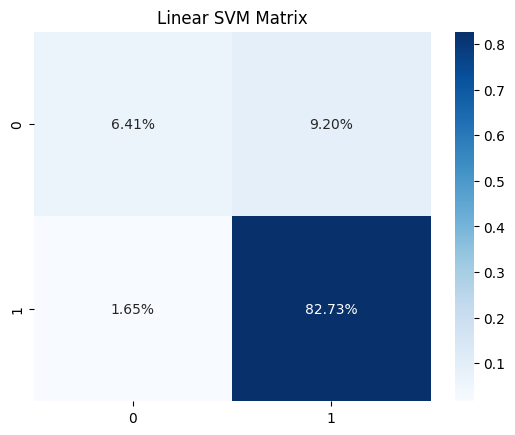

In [154]:
sns.heatmap(SVM_matrix/np.sum(SVM_matrix), annot=True,
            fmt='.2%', cmap='Blues').set(title = 'Linear SVM Matrix')

In [155]:
# Accuracy:
accuracy = accuracy_score(SVM_Model1.predict(TestingData), TestingLabels)
print('Accuracy for Linear SVM:', accuracy)

Accuracy for Linear SVM: 0.8914167528438469


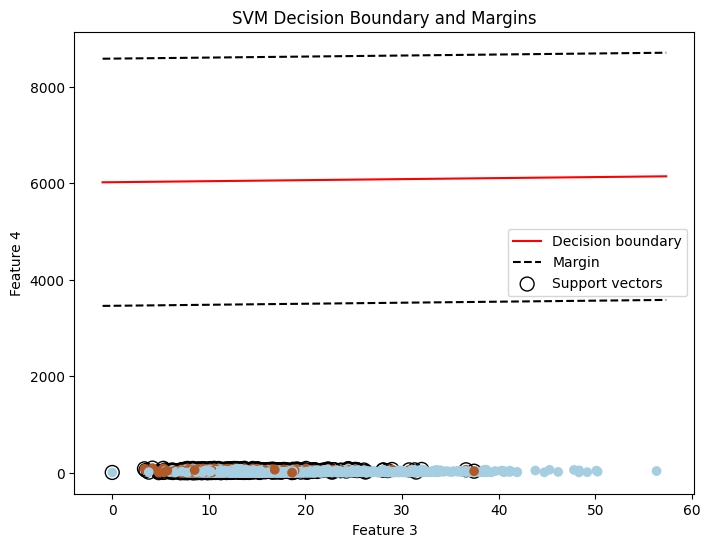

In [156]:
label_map = {"Low Poverty": 0, "High Poverty": 1}

# Apply the mapping to binarize the labels
TrainingLabels_2D = TrainingLabels.map(label_map)


# Only found a way to do 2d data, so using POC Population and Degree Percentage
TrainingData_2D = TrainingData.iloc[:, 2:4]

# Train
#Define the model with SVC
clf = SVC(C=1, kernel="linear")
clf.fit(TrainingData_2D, TrainingLabels_2D)

# Compute margin
margin = 2 / np.sqrt(np.sum(clf.coef_ ** 2))

#The slope of the SVM sep line
w = clf.coef_[0]
a = -w[0] / w[1]

# Create a variable xx that spans the feature space
xx = np.linspace(TrainingData_2D.iloc[:, 0].min() - 1, TrainingData_2D.iloc[:, 0].max() + 1, 100)

# Equation of separating hyperplane
yy = a * xx - (clf.intercept_[0]) / w[1]

# Equations for parallel margins
yy_down = yy + 0.5 * margin
yy_up = yy - 0.5 * margin

# Plot the SVM decision boundary and margins
plt.figure(figsize=(8, 6))
plt.plot(xx, yy, 'r-', label="Decision boundary")
plt.plot(xx, yy_down, 'k--', label="Margin")
plt.plot(xx, yy_up, 'k--')

# Highlight support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k', label="Support vectors")

# Scatter plot of data points
plt.scatter(TrainingData_2D.iloc[:, 0], TrainingData_2D.iloc[:, 1], c=TrainingLabels_2D, cmap=plt.cm.Paired, zorder=5)

# Add labels, legend, and tight axis
plt.xlabel("Feature 3")
plt.ylabel("Feature 4")
plt.title("SVM Decision Boundary and Margins")
plt.legend()
plt.axis('tight')
plt.show()

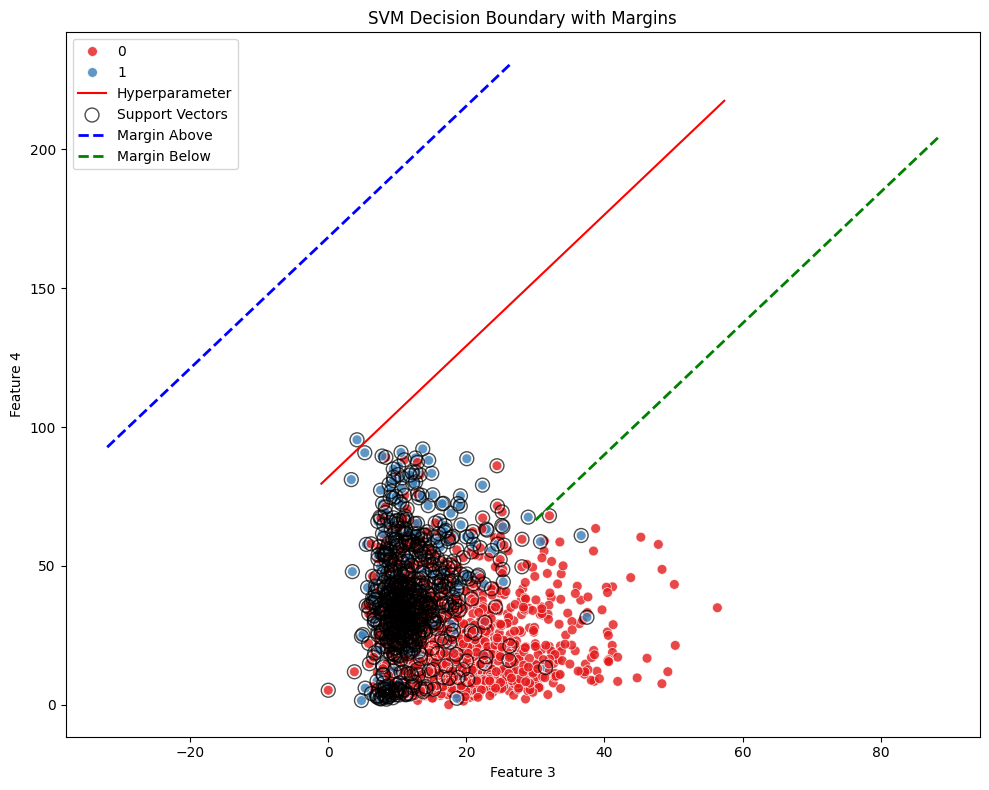

In [157]:
# Didn't like that last version, trying again
# Define and train the SVM model
svc_model = SVC(C=70, kernel="linear")
svc_model.fit(TrainingData_2D, TrainingLabels_2D)

# Extract model parameters
w = svc_model.coef_[0]  # Coefficients (w)
b = svc_model.intercept_[0]  # Intercept (b)

# Generate x-points for the hyperplane
x_points = np.linspace(TrainingData_2D.iloc[:, 0].min() - 1,
                       TrainingData_2D.iloc[:, 0].max() + 1,
                       100)

# Equation of the boundary
y_points = -(w[0] / w[1]) * x_points - b / w[1]

# Initialize plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=TrainingData_2D.iloc[:, 0],
                y=TrainingData_2D.iloc[:, 1],
                hue=TrainingLabels_2D,
                s=50,
                palette="Set1",
                alpha=0.8)

# Plotting the hyperparameter
plt.plot(x_points, y_points, c='r', label="Hyperparameter")

# Highlight support vectors
plt.scatter(svc_model.support_vectors_[:, 0],
            svc_model.support_vectors_[:, 1],
            s=100,
            facecolors='none',
            edgecolors='k',
            alpha=0.7,
            label="Support Vectors")

# Calculate margin
w_hat = svc_model.coef_[0] / np.sqrt(np.sum(svc_model.coef_[0] ** 2))
margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))

# Points for margin lines
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin

# Plot margin lines
plt.plot(points_of_line_above[:, 0],
         points_of_line_above[:, 1],
         'b--',
         linewidth=2,
         label="Margin Above")
plt.plot(points_of_line_below[:, 0],
         points_of_line_below[:, 1],
         'g--',
         linewidth=2,
         label="Margin Below")

# Add labels, legend, and tight layout
plt.xlabel("Feature 3")
plt.ylabel("Feature 4")
plt.title("SVM Decision Boundary with Margins")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [158]:
# Income category version
SVM_Model1a=LinearSVC(C=70)
SVM_Model1a.fit(TrainingData2, TrainingLabels2)

LinearSVC(C=70)

In [159]:
# Check results
print("SVM 1 prediction:\n", SVM_Model1a.predict(TestingData2)[:10])
print("Actual:")
print(TestingLabels2[:10])

SVM_matrix = confusion_matrix(TestingLabels2, SVM_Model1a.predict(TestingData2))
print("\nThe confusion matrix for Linear SVM is:")
print(SVM_matrix)
print("\n\n")

SVM 1 prediction:
 ['High' 'Medium' 'Medium' 'High' 'Low' 'Medium' 'Medium' 'Medium' 'Low'
 'Low']
Actual:
228          High
1560       Medium
1712       Medium
1209    Very High
1089          Low
3071         High
2288       Medium
1036       Medium
1519          Low
598           Low
Name: Income Category, dtype: object

The confusion matrix for Linear SVM is:
[[ 62   1 146   0   0]
 [  0 111 114   1   0]
 [ 14  27 439   0   0]
 [  0  16   0   1   0]
 [ 32   0   1   0   2]]





[Text(0.5, 1.0, 'Linear SVM Matrix - Income Category')]

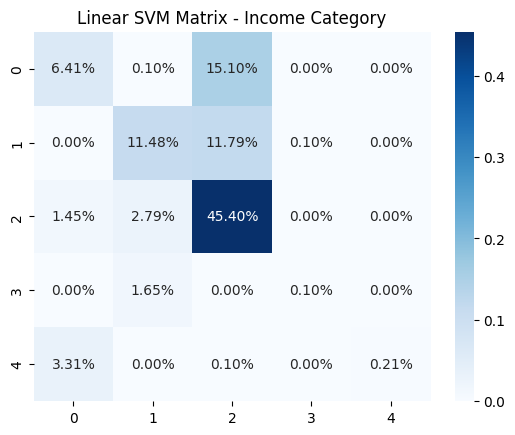

In [160]:
sns.heatmap(SVM_matrix/np.sum(SVM_matrix), annot=True,
            fmt='.2%', cmap='Blues').set(title = 'Linear SVM Matrix - Income Category')

In [161]:
# Accuracy:
accuracy = accuracy_score(SVM_Model1a.predict(TestingData2), TestingLabels2)
print('Accuracy for Linear SVM:', accuracy)

Accuracy for Linear SVM: 0.6359875904860393


In [162]:
# Now for RBF
## RBF
SVM_Model2=sklearn.svm.SVC(C=50.0, kernel='rbf', degree=3, gamma="auto")
SVM_Model2.fit(TrainingData, TrainingLabels)

print("SVM prediction:\n", SVM_Model2.predict(TestingData)[:10])
print("Actual:")
print(TestingLabels[:10])

SVM_matrix = confusion_matrix(TestingLabels, SVM_Model2.predict(TestingData))
print("\nThe confusion matrix for rbf SVM is:")
print(SVM_matrix)
print("\n\n")

SVM prediction:
 ['Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty'
 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty']
Actual:
228      Low Poverty
1560     Low Poverty
1712     Low Poverty
1209     Low Poverty
1089    High Poverty
3071     Low Poverty
2288     Low Poverty
1036     Low Poverty
1519    High Poverty
598     High Poverty
Name: Poverty Rate Classification, dtype: object

The confusion matrix for rbf SVM is:
[[  0 151]
 [  0 816]]





In [166]:
# Now for RBF 2
## RBF
SVM_Model2=sklearn.svm.SVC(C=100.0, kernel='rbf', degree=3, gamma="auto")
SVM_Model2.fit(TrainingData, TrainingLabels)

print("SVM prediction:\n", SVM_Model2.predict(TestingData)[:10])
print("Actual:")
print(TestingLabels[:10])

SVM_matrix = confusion_matrix(TestingLabels, SVM_Model2.predict(TestingData))
print("\nThe confusion matrix for rbf SVM is:")
print(SVM_matrix)
print("\n\n")

SVM prediction:
 ['Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty'
 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty']
Actual:
228      Low Poverty
1560     Low Poverty
1712     Low Poverty
1209     Low Poverty
1089    High Poverty
3071     Low Poverty
2288     Low Poverty
1036     Low Poverty
1519    High Poverty
598     High Poverty
Name: Poverty Rate Classification, dtype: object

The confusion matrix for rbf SVM is:
[[  0 151]
 [  0 816]]





In [167]:
# Now for RBF 2
## RBF
SVM_Model2=sklearn.svm.SVC(C=150.0, kernel='rbf', degree=3, gamma="auto")
SVM_Model2.fit(TrainingData, TrainingLabels)

print("SVM prediction:\n", SVM_Model2.predict(TestingData)[:10])
print("Actual:")
print(TestingLabels[:10])

SVM_matrix = confusion_matrix(TestingLabels, SVM_Model2.predict(TestingData))
print("\nThe confusion matrix for rbf SVM is:")
print(SVM_matrix)
print("\n\n")

SVM prediction:
 ['Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty'
 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty']
Actual:
228      Low Poverty
1560     Low Poverty
1712     Low Poverty
1209     Low Poverty
1089    High Poverty
3071     Low Poverty
2288     Low Poverty
1036     Low Poverty
1519    High Poverty
598     High Poverty
Name: Poverty Rate Classification, dtype: object

The confusion matrix for rbf SVM is:
[[  0 151]
 [  0 816]]





[Text(0.5, 1.0, 'RBF SVM Matrix')]

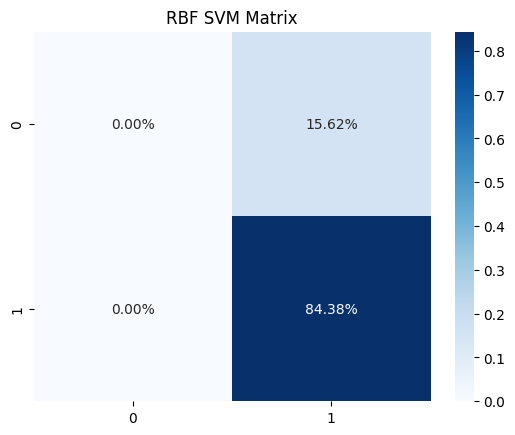

In [168]:
sns.heatmap(SVM_matrix/np.sum(SVM_matrix), annot=True,
            fmt='.2%', cmap='Blues').set(title = 'RBF SVM Matrix')

In [169]:
# Accuracy:
accuracy = accuracy_score(SVM_Model2.predict(TestingData), TestingLabels)
print('Accuracy for RBF SVM:', accuracy)

Accuracy for RBF SVM: 0.843846949327818


In [170]:
# Income Category version
SVM_Model2a=sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma="auto")
SVM_Model2a.fit(TrainingData2, TrainingLabels2)

print("SVM prediction:\n", SVM_Model2a.predict(TestingData2)[:10])
print("Actual:")
print(TestingLabels2[:10])

SVM_matrix = confusion_matrix(TestingLabels2, SVM_Model2a.predict(TestingData2))
print("\nThe confusion matrix for rbf SVM is:")
print(SVM_matrix)
print("\n\n")

SVM prediction:
 ['Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium']
Actual:
228          High
1560       Medium
1712       Medium
1209    Very High
1089          Low
3071         High
2288       Medium
1036       Medium
1519          Low
598           Low
Name: Income Category, dtype: object

The confusion matrix for rbf SVM is:
[[  0   0 209   0   0]
 [  0   0 226   0   0]
 [  0   0 480   0   0]
 [  0   0  17   0   0]
 [  0   0  35   0   0]]





[Text(0.5, 1.0, 'RBF SVM Matrix - Income Category')]

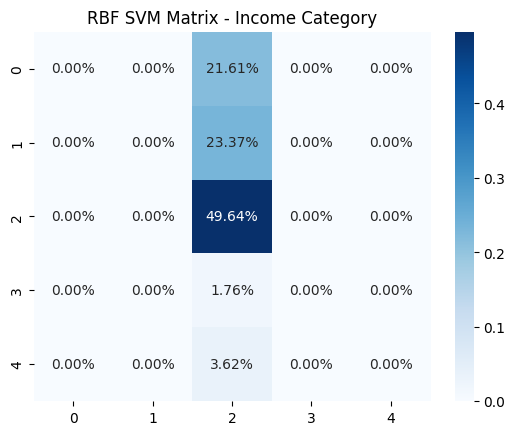

In [171]:
sns.heatmap(SVM_matrix/np.sum(SVM_matrix), annot=True,
            fmt='.2%', cmap='Blues').set(title = 'RBF SVM Matrix - Income Category')

In [172]:
# Accuracy:
accuracy = accuracy_score(SVM_Model2a.predict(TestingData2), TestingLabels2)
print('Accuracy for RBF SVM - Income Category:', accuracy)

Accuracy for RBF SVM - Income Category: 0.4963805584281282


In [173]:
## SIGMOID - can be used since it's a binary label
SVM_Model3=SVC(kernel='sigmoid', gamma='auto', C=1.0, coef0=1.0)
SVM_Model3.fit(TrainingData, TrainingLabels)

print("SVM prediction:\n", SVM_Model3.predict(TestingData)[:10])
print("Actual:")
print(TestingLabels[:10])

SVM_matrix = confusion_matrix(TestingLabels, SVM_Model3.predict(TestingData))
print("\nThe confusion matrix for sigmoid SVM is:")
print(SVM_matrix)
print("\n\n")

SVM prediction:
 ['Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty'
 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty']
Actual:
228      Low Poverty
1560     Low Poverty
1712     Low Poverty
1209     Low Poverty
1089    High Poverty
3071     Low Poverty
2288     Low Poverty
1036     Low Poverty
1519    High Poverty
598     High Poverty
Name: Poverty Rate Classification, dtype: object

The confusion matrix for sigmoid SVM is:
[[  0 151]
 [  0 816]]





In [174]:
## SIGMOID 2
SVM_Model3=SVC(kernel='sigmoid', gamma='auto', C=50.0, coef0=1.0)
SVM_Model3.fit(TrainingData, TrainingLabels)

print("SVM prediction:\n", SVM_Model3.predict(TestingData)[:10])
print("Actual:")
print(TestingLabels[:10])

SVM_matrix = confusion_matrix(TestingLabels, SVM_Model3.predict(TestingData))
print("\nThe confusion matrix for sigmoid SVM is:")
print(SVM_matrix)
print("\n\n")

SVM prediction:
 ['Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty'
 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty']
Actual:
228      Low Poverty
1560     Low Poverty
1712     Low Poverty
1209     Low Poverty
1089    High Poverty
3071     Low Poverty
2288     Low Poverty
1036     Low Poverty
1519    High Poverty
598     High Poverty
Name: Poverty Rate Classification, dtype: object

The confusion matrix for sigmoid SVM is:
[[  0 151]
 [  0 816]]





In [176]:
## SIGMOID 3
SVM_Model3=SVC(kernel='sigmoid', gamma='auto', C=100.0, coef0=1.0)
SVM_Model3.fit(TrainingData, TrainingLabels)

print("SVM prediction:\n", SVM_Model3.predict(TestingData)[:10])
print("Actual:")
print(TestingLabels[:10])

SVM_matrix = confusion_matrix(TestingLabels, SVM_Model3.predict(TestingData))
print("\nThe confusion matrix for sigmoid SVM is:")
print(SVM_matrix)
print("\n\n")

SVM prediction:
 ['Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty'
 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty' 'Low Poverty']
Actual:
228      Low Poverty
1560     Low Poverty
1712     Low Poverty
1209     Low Poverty
1089    High Poverty
3071     Low Poverty
2288     Low Poverty
1036     Low Poverty
1519    High Poverty
598     High Poverty
Name: Poverty Rate Classification, dtype: object

The confusion matrix for sigmoid SVM is:
[[  0 151]
 [  0 816]]





[Text(0.5, 1.0, 'Sigmoid SVM Matrix')]

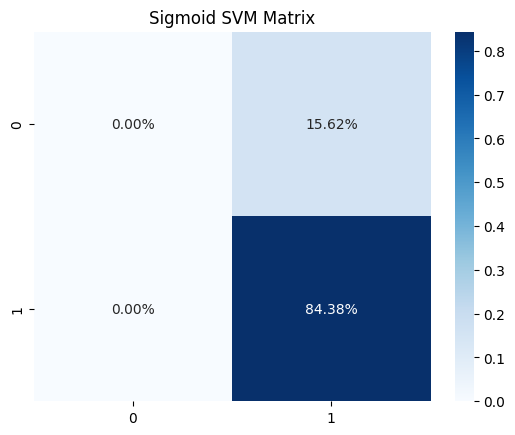

In [177]:
sns.heatmap(SVM_matrix/np.sum(SVM_matrix), annot=True,
            fmt='.2%', cmap='Blues').set(title = 'Sigmoid SVM Matrix')

In [178]:
# Accuracy:
accuracy = accuracy_score(SVM_Model3.predict(TestingData), TestingLabels)
print('Accuracy for Sigmoid SVM:', accuracy)

Accuracy for Sigmoid SVM: 0.843846949327818


In [179]:
# Now for boosting method - ADABoost
# Need to encode both sets of labels
label_encoder = LabelEncoder()


In [180]:

TrainingLabels_encoded = label_encoder.fit_transform(TrainingLabels)
TestingLabels_encoded = label_encoder.transform(TestingLabels)
TrainingLabels2_encoded = label_encoder.fit_transform(TrainingLabels2)
TestingLabels2_encoded = label_encoder.fit_transform(TestingLabels2)

In [182]:
# Initialize adaboost, fit the model
adaboost = AdaBoostClassifier(n_estimators=50, random_state=81)
adaboost.fit(TrainingData, TrainingLabels_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=81)

In [183]:
Prediction = adaboost.predict(TestingData)

In [184]:
# Decode labels
PredictedLabels = label_encoder.inverse_transform(Prediction)


In [185]:
print("AdaBoost prediction:\n", adaboost.predict(TestingData)[:10])
print("Actual:")
print(TestingLabels[:10])

adaboost_matrix = confusion_matrix(TestingLabels_encoded, adaboost.predict(TestingData))
print("\nThe confusion matrix for AdaBoost is:")
print(adaboost_matrix)
print("\n\n")

AdaBoost prediction:
 [1 1 1 1 0 1 1 1 1 0]
Actual:
228      Low Poverty
1560     Low Poverty
1712     Low Poverty
1209     Low Poverty
1089    High Poverty
3071     Low Poverty
2288     Low Poverty
1036     Low Poverty
1519    High Poverty
598     High Poverty
Name: Poverty Rate Classification, dtype: object

The confusion matrix for AdaBoost is:
[[ 80  71]
 [ 31 785]]





[Text(0.5, 1.0, 'AdaBoost Matrix')]

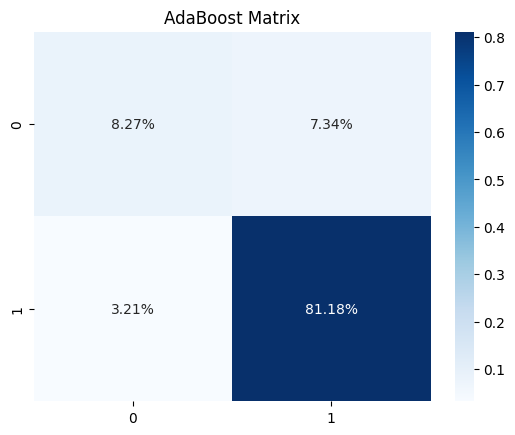

In [186]:
sns.heatmap(adaboost_matrix/np.sum(adaboost_matrix), annot=True,
            fmt='.2%', cmap='Blues').set(title = 'AdaBoost Matrix')

In [187]:
# Accuracy:
accuracy = accuracy_score(adaboost.predict(TestingData), TestingLabels_encoded)
print('Accuracy for AdaBoost:', accuracy)

Accuracy for AdaBoost: 0.8945191313340227


In [189]:
# Classificaiton Report
print(classification_report(TestingLabels_encoded, Prediction))

              precision    recall  f1-score   support

           0       0.72      0.53      0.61       151
           1       0.92      0.96      0.94       816

    accuracy                           0.89       967
   macro avg       0.82      0.75      0.77       967
weighted avg       0.89      0.89      0.89       967



In [190]:
# Attempt Income category AdaBoost:
adaboost.fit(TrainingData2, TrainingLabels2_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=81)

In [191]:
Prediction = adaboost.predict(TestingData2)

In [192]:
# Decode labels
PredictedLabels = label_encoder.inverse_transform(Prediction)

In [193]:
print("AdaBoost prediction:\n", adaboost.predict(TestingData2)[:10])
print("Actual:")
print(TestingLabels2[:10])

adaboost_matrix = confusion_matrix(TestingLabels2_encoded, adaboost.predict(TestingData2))
print("\nThe confusion matrix for AdaBoost is:")
print(adaboost_matrix)
print("\n\n")

AdaBoost prediction:
 [0 0 2 4 1 0 2 1 1 1]
Actual:
228          High
1560       Medium
1712       Medium
1209    Very High
1089          Low
3071         High
2288       Medium
1036       Medium
1519          Low
598           Low
Name: Income Category, dtype: object

The confusion matrix for AdaBoost is:
[[118   2  61   0  28]
 [  4 161  61   0   0]
 [ 49  56 373   0   2]
 [  0   6   0  11   0]
 [  6   0   0   0  29]]





[Text(0.5, 1.0, 'AdaBoost Matrix - Income Category')]

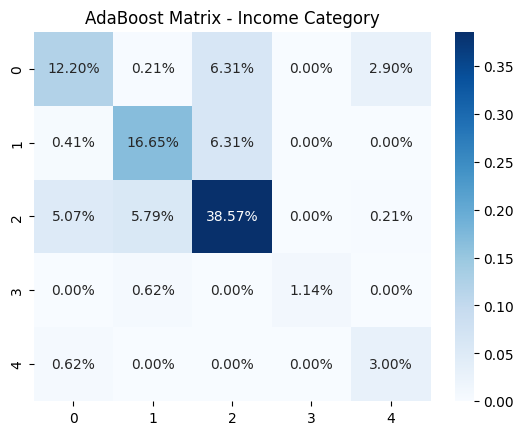

In [194]:
sns.heatmap(adaboost_matrix/np.sum(adaboost_matrix), annot=True,
            fmt='.2%', cmap='Blues').set(title = 'AdaBoost Matrix - Income Category')

In [195]:
# Accuracy:
accuracy = accuracy_score(adaboost.predict(TestingData2), TestingLabels2_encoded)
print('Accuracy for AdaBoost - Income Category:', accuracy)

Accuracy for AdaBoost - Income Category: 0.7156153050672182


In [196]:
# Classificaiton Report
print(classification_report(TestingLabels2_encoded, Prediction))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61       209
           1       0.72      0.71      0.71       226
           2       0.75      0.78      0.77       480
           3       1.00      0.65      0.79        17
           4       0.49      0.83      0.62        35

    accuracy                           0.72       967
   macro avg       0.73      0.71      0.70       967
weighted avg       0.72      0.72      0.71       967

